## Kategorik degerleri transform etme

In [1]:
import pandas as pd  #asagida dönöstürdügümüz veriyi daha iyi görmek icin,1 veya 0 seklinde
import numpy as np  #asagida polinom fetures üretmek icin kullanacagiz
import matplotlib.pyplot as plt

In [2]:
data = [{'not': 85, 'kardes': 4, 'ders':'mat'},
       {'not': 60, 'kardes': 3, 'ders':'ing'},
       {'not': 75, 'kardes': 2, 'ders':'mat'},
       {'not': 90, 'kardes': 4, 'ders':'fiz'}]

In [3]:
data

[{'not': 85, 'kardes': 4, 'ders': 'mat'},
 {'not': 60, 'kardes': 3, 'ders': 'ing'},
 {'not': 75, 'kardes': 2, 'ders': 'mat'},
 {'not': 90, 'kardes': 4, 'ders': 'fiz'}]

In [4]:
from sklearn.feature_extraction import DictVectorizer
#simdi mat ,ing, fiz kelimelerini sklearn'in anlayacagi sekilde kodlayalim

In [5]:
vek = DictVectorizer(sparse=False, dtype=int) 
#burda bir model aldik
#sparse bu veriyi matrixe cevirelim mi diye True cevir

In [6]:
vek

DictVectorizer(dtype=<class 'int'>, sparse=False)

In [7]:
 vek.fit_transform(data)  #veriyi dönüstüruyoruz
    #yukarida vek yapmasak bu olmazdi galiba
    
#allta sütun isimleri var,bu ilk sütun fiz,ing diye gidiyor
#bu yöntemin dezavantaji, kategoriler, yani ders sayilari fazla olursa, 
#sifir sayilari artacagi icin veri seti büyüyecek
#bu durumda sparse yi True almaliyiz

array([[ 0,  0,  1,  4, 85],
       [ 0,  1,  0,  3, 60],
       [ 0,  0,  1,  2, 75],
       [ 1,  0,  0,  4, 90]])

In [8]:
vek.get_feature_names()

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ders=fiz', 'ders=ing', 'ders=mat', 'kardes', 'not']

In [9]:
vek = DictVectorizer(sparse=True, dtype=int)
vek.fit_transform(data)

#burda veriyi kücülttü galiba
#verinin 4x5 oldugunu ve 12 bileseni oldugu yaziyor
#12 bilesende galiba 4 kisi var ve [not,kardes,ders] diye features var

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

## yazilari sayisal ifadelere dönüstürme

In [10]:
#sosyal medya projelerinde kullanilabilir

In [11]:
veri = ['hava iyi',
       'iyi insan',
       'hava bozuk']

In [12]:
veri

['hava iyi', 'iyi insan', 'hava bozuk']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vek = CountVectorizer()    #textleri sayilara ceviriyor

In [15]:
vek

CountVectorizer()

In [16]:
X = vek.fit_transform(veri)
X 

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [17]:
pd.DataFrame(X.toarray(), columns=vek.get_feature_names())
#bir üstte transform ettigimiz veriyi görmek icin,
#toarray bize bir nparray veriyor, onu DataFrame icine yazinca DataFrame dönüyor 

,bozuk,hava,insan,iyi
0,0,1,0,1
1,0,0,1,1
2,1,1,0,0


### features üretme

In [18]:
# featureslerden polinomsal feature olusturma

In [19]:
x = np.array([1,2,3,4,5])
y = np.array([5,3,1,2,7])

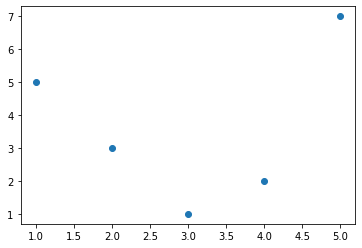

In [20]:
plt.scatter(x,y);

In [21]:
from sklearn.linear_model import LinearRegression

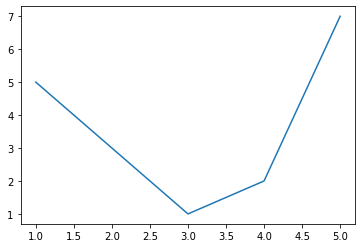

In [22]:
plt.plot(x,y)

In [23]:
X = x[:,np.newaxis]
#x i iki boyutli diziye cevirelim ki, modele koyalim
print(x)
print(X)

[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]


In [24]:
model = LinearRegression().fit(X,y)

#model kurduk 

In [25]:
y_pred = model.predict(X)
y_pred

#bu LienarRegression modeli oldugu icin tahminide Linear bir dgoru boyunca oldu

array([3. , 3.3, 3.6, 3.9, 4.2])

In [26]:
y_pred_X = model.predict(X)
y_pred_X   #tahmin oldugu icin 2D geliyor

array([3. , 3.3, 3.6, 3.9, 4.2])

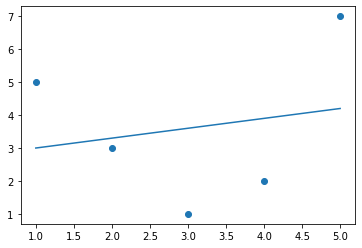

In [27]:
plt.scatter(X,y)
plt.plot(X,y_pred_X)


#bu grafikten bu modelin bu veri setinde basarili olmadigini görüyoruz

In [28]:
Y = y[:,np.newaxis]  #modele koyarken 2D olmasi gerekiyor

model.score(Y,y_pred_X)

#burdanda gayet kötü tahmin ettigini görüyoruz,
#böyle cikmasi mantikli, cünkü x ve y degerlerini y=ax+b sekline göre olusturmadigimiz
#icin bir dogru etrafinda olmadi
#ve LinearRegression da basarili olamadi
#ama asagida plinom ile gelistirecegiz

-1.9000000000000008

In [29]:
from sklearn.preprocessing import PolynomialFeatures

#buna cözüm olarak modele exrta featuresler ekleyecegiz
#oda en bastaki x degerlerini kareleri ve küpleri degerleri ekleyecegiz

In [30]:
pol = PolynomialFeatures(degree=3, include_bias=False)

In [31]:
X2 = pol.fit_transform(X)
X2
#ilk sütun x,ikinci xkare,ücüncü x küp

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [32]:
model = LinearRegression().fit(X2,y)
model

LinearRegression()

In [33]:
y_pred_X2 = model.predict(X2)
y_pred_X2

#modelin tahmini,PolynomialFeatures bunula gelistirdikten sonra

array([5.02857143, 2.88571429, 1.17142857, 1.88571429, 7.02857143])

In [34]:
y   #yaklasmaya calistigi degerler

array([5, 3, 1, 2, 7])

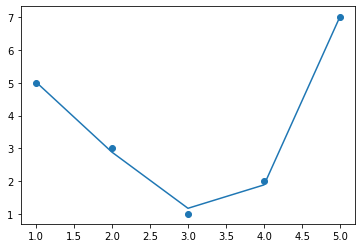

In [35]:
plt.scatter(x,y)
plt.plot(x,y_pred_X2);

#modeli iyilestirmis olduk